<a href="https://colab.research.google.com/github/2147118Joshua/Neural-Networks/blob/main/CNN_architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [2]:
from keras.datasets import cifar10
(train_images,train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
from keras.utils import to_categorical
print('Shape of Training: ',train_images.shape, train_labels.shape)
print('Shape of Testing data: ',test_images.shape, test_labels.shape)

Shape of Training:  (50000, 32, 32, 3) (50000, 1)
Shape of Testing data:  (10000, 32, 32, 3) (10000, 1)


Find unique numbers from the train labels

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [5]:
from keras.datasets import cifar10
(train_images,train_labels), (test_images, test_labels) = cifar10.load_data()

In [6]:
from keras.utils import to_categorical
print('Shape of Training: ',train_images.shape, train_labels.shape)
print('Shape of Testing data: ',test_images.shape, test_labels.shape)

Shape of Training:  (50000, 32, 32, 3) (50000, 1)
Shape of Testing data:  (10000, 32, 32, 3) (10000, 1)


Find unique numbers from the train labels

In [7]:
classes = np.unique(train_labels)
no_of_classes = len(classes)
print("Total number of outputs: ",no_of_classes)
print("Output Classes: ",classes)

Total number of outputs:  10
Output Classes:  [0 1 2 3 4 5 6 7 8 9]


Find the shape  of input images and create the variable input_shape

In [8]:
no_of_rows, no_of_cols, no_of_dims = train_images.shape[1:]

training_Data = train_images.reshape(train_images.shape[0], no_of_rows, no_of_cols, no_of_dims)
testing_Data = test_images.reshape(test_images.shape[0], no_of_rows, no_of_cols, no_of_dims)

input_shape = (no_of_rows, no_of_cols, no_of_dims)

In [9]:
#change the datatype to float
training_Data = training_Data.astype('float32')
testing_Data = testing_Data.astype('float32')

In [10]:
# Scale the data to lie between 0 to 1
training_Data /=255
testing_Data /=255

In [11]:
#change the labels from integer to categorical data
train_Labels = to_categorical(train_labels)
test_Labels = to_categorical(test_labels)

In [12]:
# Display the change for category label using one hot encoding
print("Original label 0 : ",train_labels[0])
print("On conversion to categorical (one-hot): ",train_Labels[0])

Original label 0 :  [6]
On conversion to categorical (one-hot):  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

KeyError: ignored

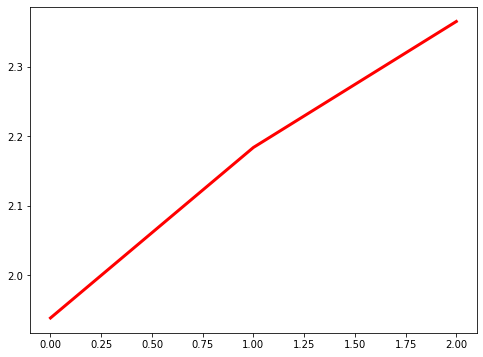

In [13]:
def createModel():
  model = Sequential()

  #the first two layers with 32 filters of window size 3x3
  model.add(Conv2D(32,(3,3),padding='same',activation='relu', input_shape=input_shape))
  model.add(Conv2D(32,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(no_of_classes,activation='softmax'))

  return model

model_one=createModel()
batch_size=3
epochs=3
model_one.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model_one.summary()
history=model_one.fit(training_Data, train_Labels, batch_size=batch_size, epochs=epochs,verbose=1, validation_data=(testing_Data, test_Labels))
model_one.evaluate(testing_Data, test_Labels)
model_one.predict(testing_Data)


#Loss curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['var_loss'],'b',linewidth=3.0)
plt.legend(['Training loss','Validation loss'],fontsize=18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves',  fontsize=16)

#accuracy curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy','Validation Accuracy'], fontsize=18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves',  fontsize=16)